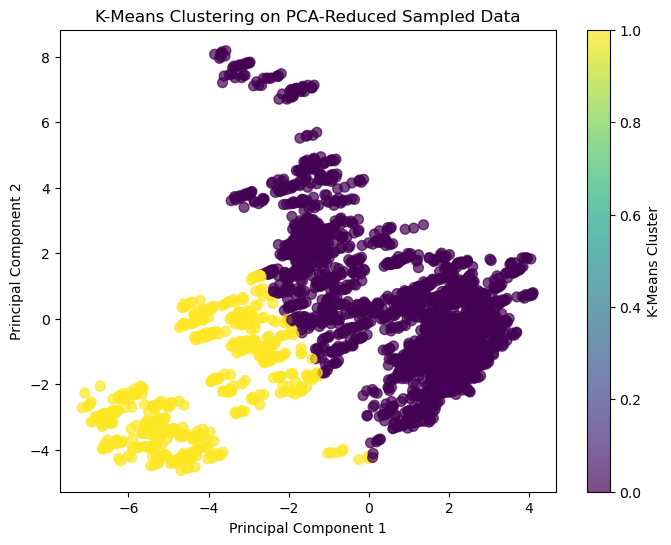

K-Means Silhouette Score (Sampled Data): 0.47


In [7]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (example file path, replace with actual file if needed)
# Assuming 'data_numeric' already exists and contains the numeric dataset used in PCA
data_numeric = pd.read_csv('merged_solubility_reduced.csv').select_dtypes(include=[float, int])

sampled_data = data_numeric.sample(frac=0.1, random_state=42)  # 10% of the dataset

# Perform PCA on the sampled data
scaler = StandardScaler()
X_sampled_scaled = scaler.fit_transform(sampled_data.drop(columns=['KMeans_Cluster', 'Agglo_Cluster'], errors='ignore'))
pca = PCA(n_components=2)
X_sampled_pca = pca.fit_transform(X_sampled_scaled)

# Apply K-Means clustering to the sampled data
kmeans_sampled = KMeans(n_clusters=2, random_state=42)
kmeans_sampled_labels = kmeans_sampled.fit_predict(X_sampled_pca)

# Calculate Silhouette Score for sampled data
kmeans_sampled_silhouette = silhouette_score(X_sampled_pca, kmeans_sampled_labels)

# Visualization of K-Means Clusters (sampled data)
plt.figure(figsize=(8, 6))
plt.scatter(X_sampled_pca[:, 0], X_sampled_pca[:, 1], c=kmeans_sampled_labels, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='K-Means Cluster')
plt.title('K-Means Clustering on PCA-Reduced Sampled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display Silhouette Score
print(f"K-Means Silhouette Score (Sampled Data): {kmeans_sampled_silhouette:.2f}")

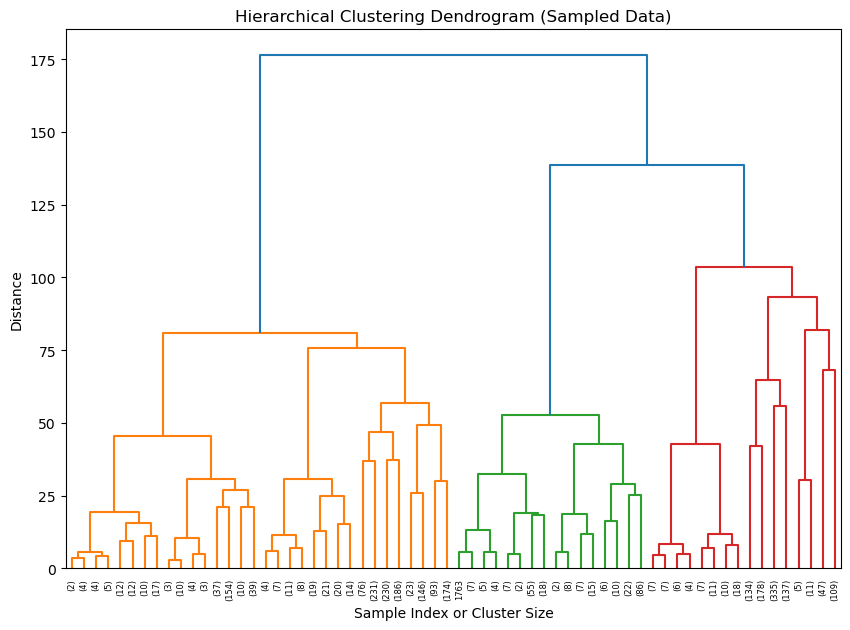

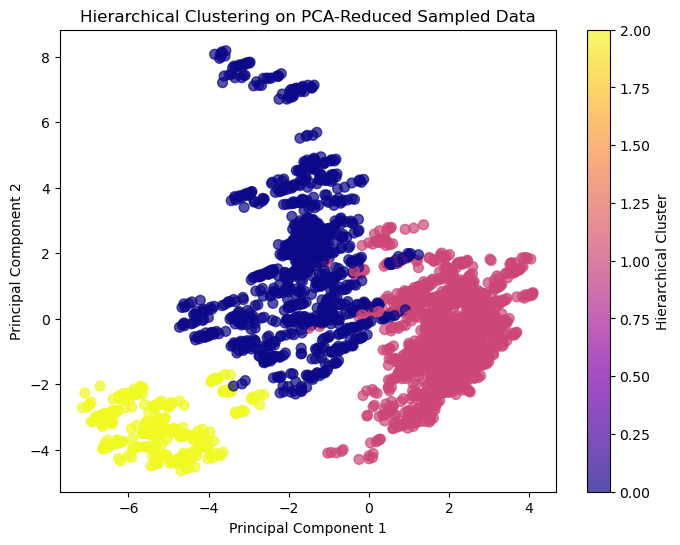

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform Hierarchical Clustering (Ward's Method minimizes variance within clusters)
linkage_matrix = linkage(X_sampled_scaled, method='ward')

# Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

# Assign Cluster Labels Using Agglomerative Clustering
agglo_sampled = AgglomerativeClustering(n_clusters=3)  # Specify number of clusters
agglo_sampled_labels = agglo_sampled.fit_predict(X_sampled_scaled)

# Visualize Clustering Results
plt.figure(figsize=(8, 6))
plt.scatter(X_sampled_pca[:, 0], X_sampled_pca[:, 1], c=agglo_sampled_labels, cmap='plasma', s=50, alpha=0.7)
plt.colorbar(label='Hierarchical Cluster')
plt.title('Hierarchical Clustering on PCA-Reduced Sampled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


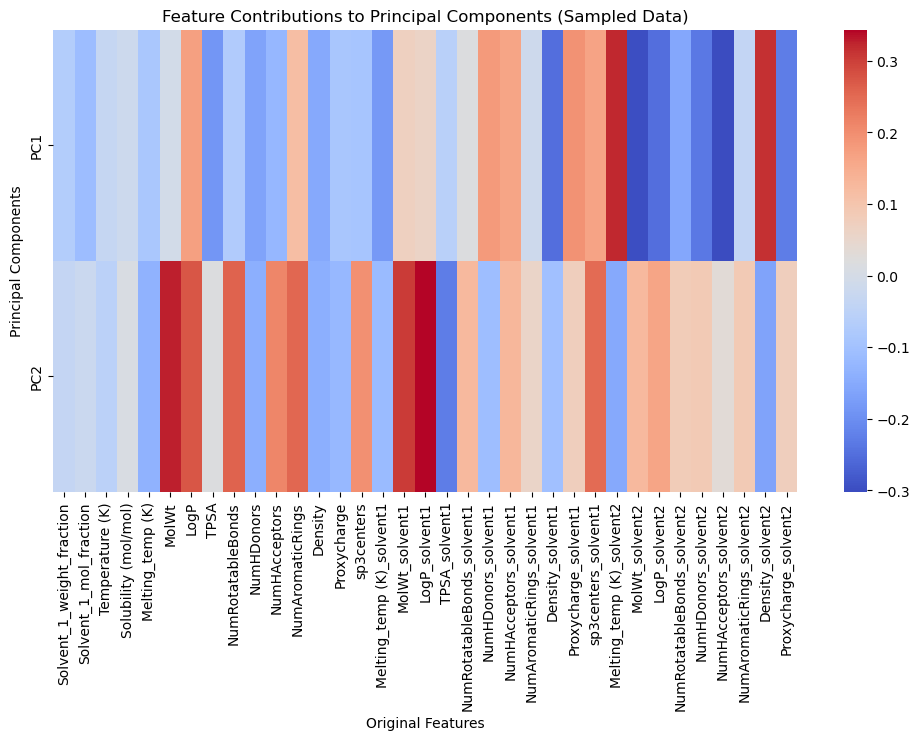

In [6]:
# Feature Contributions to PCA
pca_components = pd.DataFrame(pca.components_, columns=sampled_data.columns, index=['PC1', 'PC2'])

# Visualize PCA Feature Contributions with a Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Feature Contributions to Principal Components (Sampled Data)')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

# Save PCA Components Table
pca_components.to_csv("PCA_Feature_Contributions.csv", index=True)
